In [1]:
from astropop.photometry import aperture_photometry
from astropop.photometry import segfind, daofind, starfind
from astropy.stats import sigma_clipped_stats
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

%matplotlib notebook

In [2]:
im = fits.getdata('/run/user/1000/gvfs/sftp:host=kepler.local/storage/data/dados/Raw/AAVSO/cjca/20221209/RMC_40_bsm_berry_SR_221209_145531_cjca.fts.bz2')
mean, median, std = sigma_clipped_stats(im)

In [3]:
# sources = segfind(im, threshold=2, background=median, noise=std, fwhm=3.0)

In [4]:
sources = starfind(im.astype('f8'), threshold=8, background=median, noise=std, fwhm=5.0, exclude_border=True,
                   sharp_limit=(0, 100), round_limit=(-20, 20))

In [5]:
print(len(sources))

634


<IPython.core.display.Javascript object>


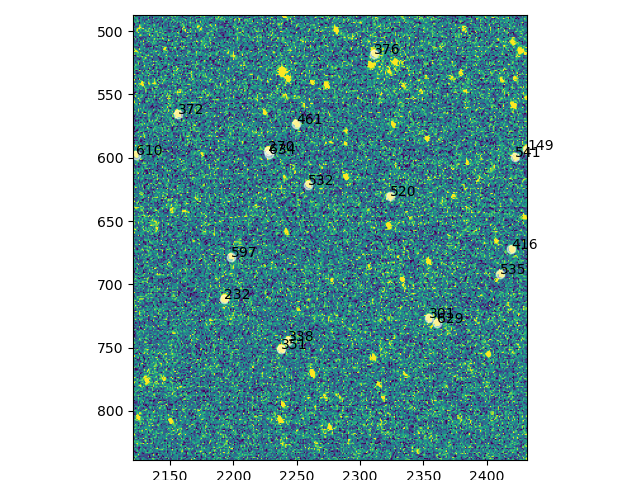

In [6]:
plt.figure()
plt.imshow(im, vmin=np.percentile(im, 5), vmax=np.percentile(im, 98))
plt.plot(sources['x'], sources['y'], 'wo', alpha=0.5)
for i, txt in enumerate(sources['id']):
    plt.annotate(txt, (sources['x'][i], sources['y'][i]))
plt.tight_layout()
plt.show()

In [ ]:
sources

In [ ]:
from astropop.photometry.detection import sources_morfology

In [ ]:
bkg = np.full(im.shape, fill_value=median)
s = sources_morfology(im.astype('f8'), sources['x'], sources['y'], r=10, background=bkg)

In [ ]:
s